In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Training Features

In [2]:
rawfeats = pd.read_csv('dengue_features_train.csv')
print(rawfeats.shape)
rawfeats.head()

(1456, 24)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


### Training Labels

In [3]:
rawlabels = pd.read_csv('dengue_labels_train.csv')
print(rawlabels.shape)
rawlabels.head()

(1456, 4)


,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


### Test Features

In [4]:
testfeats = pd.read_csv('dengue_features_test.csv')
print(testfeats.shape)
testfeats.head()

(416, 24)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


### There are two cities in the dataset, in similar proportions in both test and train data

In [41]:
rawlabels.groupby('city').agg('count')

,year,weekofyear,total_cases
city,,,
iq,520,520,520
sj,936,936,936


In [45]:
testfeats.groupby('city')[['year','weekofyear']].agg('count')

,year,weekofyear
city,,
iq,156,156
sj,260,260


### Our target variable is no normal, resembling perhaps a poisson or negative binomial distribution

c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


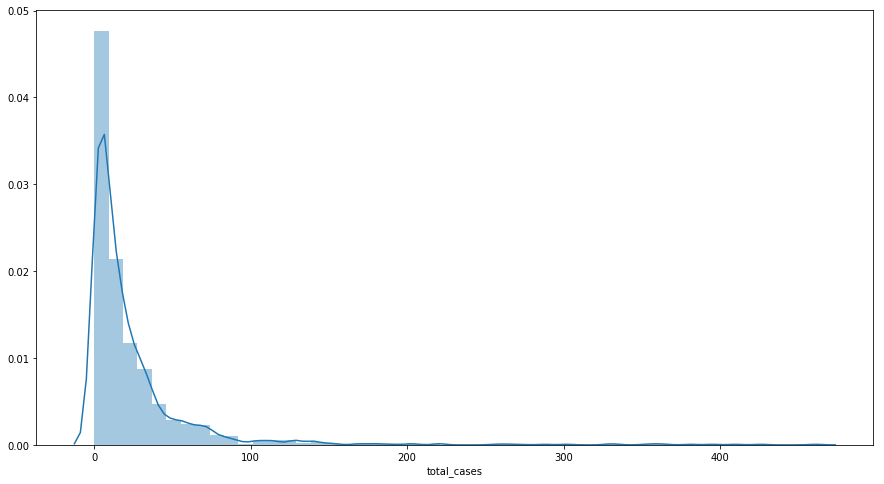

In [47]:
#outcome variable
plt.figure(figsize=[15,8])
sns.distplot(rawlabels.total_cases, bins=50)
plt.show()

# Feature Analysis: viewing distributions in both train and test features

## Time

#### Observations in are taken relatively uniformly throughout the year

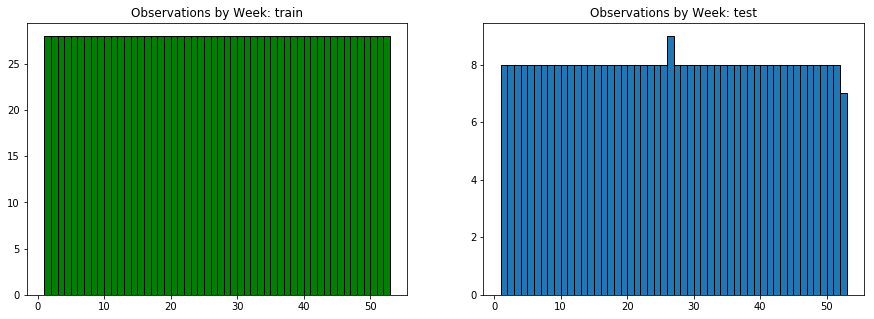

In [48]:
plt.figure(figsize=[15,5])
plt.subplot(121)
plt.hist(rawfeats.weekofyear, bins=52, 
         ec='black',color='green')
plt.title('Observations by Week: train')
plt.subplot(122)
plt.hist(testfeats.weekofyear, bins=52,ec='black',)
plt.title('Observations by Week: test')

plt.show()

#### Later Years have more observations

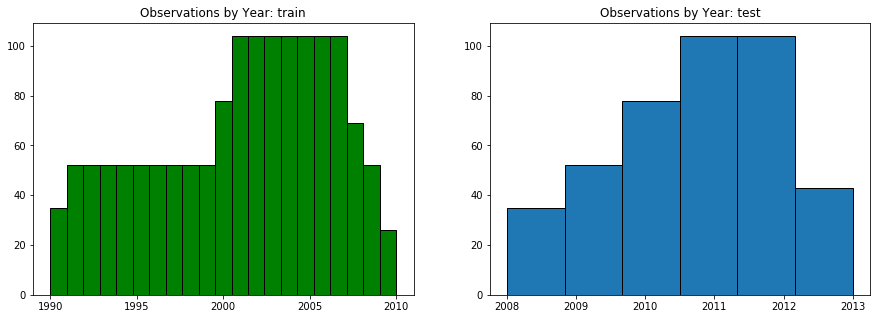

In [49]:
plt.figure(figsize=[15,5])
plt.subplot(121)
plt.hist(rawfeats.year, ec='black', color='green',
         bins=rawfeats.year.nunique())
plt.xticks(labels=[1990,1995,2000,2005,2010], 
          ticks=[1990,1995,2000,2005,2010])
plt.title('Observations by Year: train')
plt.subplot(122)
plt.hist(testfeats.year, ec='black',
         bins=testfeats.year.nunique())
plt.title('Observations by Year: test')
plt.show()

## Temperature: NOAA GHCN daily climate data

#### In some cases, the training data has outlier temperatures that are not observed in the test data. Removing or shifting these may be something to explore

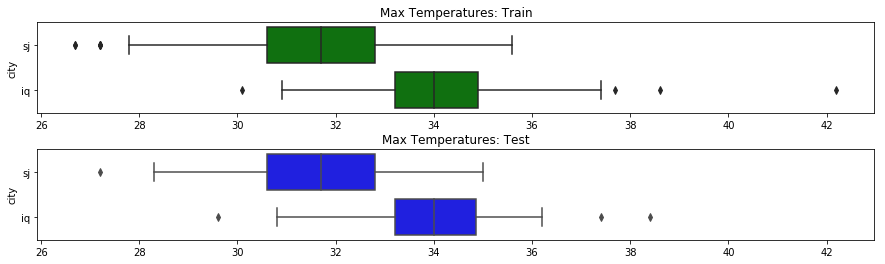

In [12]:
#MAX TEMPERATURES
fig = plt.figure(figsize=[15,4])
ax1 = plt.subplot(211)
sns.boxplot(x='station_max_temp_c', y='city',
            color='green', data=rawfeats, ax=ax1)
plt.xlabel('')
plt.title('Max Temperatures: Train')
ax2 = plt.subplot(212, sharex=ax1)
sns.boxplot(x='station_max_temp_c', y='city',
            color='blue', data=testfeats, ax=ax2)
plt.title('Max Temperatures: Test')
plt.xlabel('')
plt.subplots_adjust(hspace=.4)
plt.show()

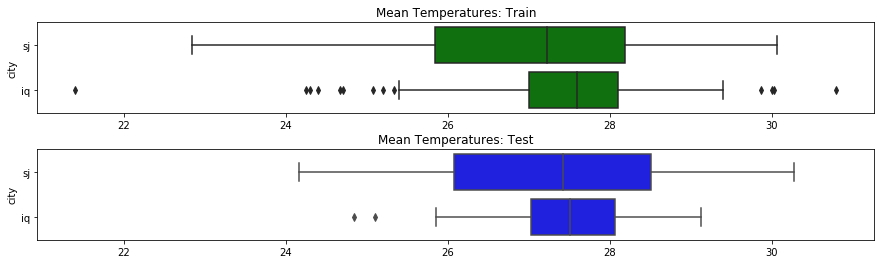

In [13]:
#MEAN TEMPERATURES
fig = plt.figure(figsize=[15,4])
ax1 = plt.subplot(211)
sns.boxplot(x='station_avg_temp_c', y='city',
            color='green', data=rawfeats, ax=ax1)
plt.xlabel('')
plt.title('Mean Temperatures: Train')
ax2 = plt.subplot(212, sharex=ax1)
sns.boxplot(x='station_avg_temp_c', y='city',
            color='blue', data=testfeats, ax=ax2)
plt.title('Mean Temperatures: Test')
plt.xlabel('')
plt.subplots_adjust(hspace=.4)
plt.show()

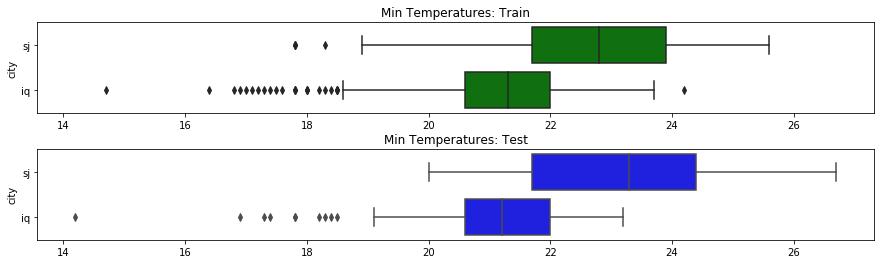

In [14]:
#MIN TEMPERATURES
fig = plt.figure(figsize=[15,4])
ax1 = plt.subplot(211)
sns.boxplot(x='station_min_temp_c', y='city',
            color='green', data=rawfeats, ax=ax1)
plt.xlabel('')
plt.title('Min Temperatures: Train')
ax2 = plt.subplot(212, sharex=ax1)
plt.title('Min Temperatures: Test')
sns.boxplot(x='station_min_temp_c', y='city',
            color='blue', data=testfeats, ax=ax2)
plt.xlabel('')
plt.subplots_adjust(hspace=.4)
plt.show()

## Temperature: NOAA's NCEP Climate Forecast System Reanalysis

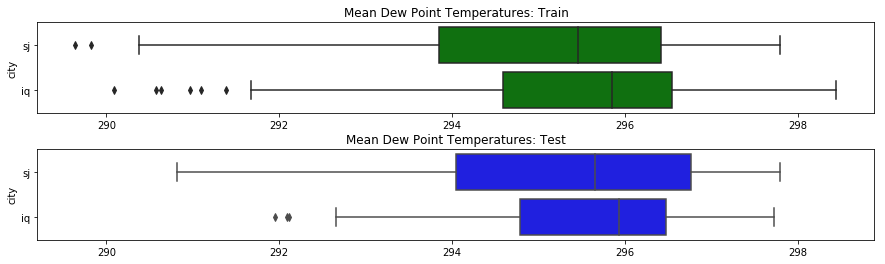

In [15]:
fig = plt.figure(figsize=[15,4])
ax1 = plt.subplot(211)
sns.boxplot(x='reanalysis_dew_point_temp_k', y='city',
            color='green', data=rawfeats, ax=ax1)
plt.xlabel('')
plt.title('Mean Dew Point Temperatures: Train')
ax2 = plt.subplot(212, sharex=ax1)
plt.title('Mean Dew Point Temperatures: Test')
sns.boxplot(x='reanalysis_dew_point_temp_k', y='city',
            color='blue', data=testfeats, ax=ax2)
plt.xlabel('')
plt.subplots_adjust(hspace=.4)
plt.show()

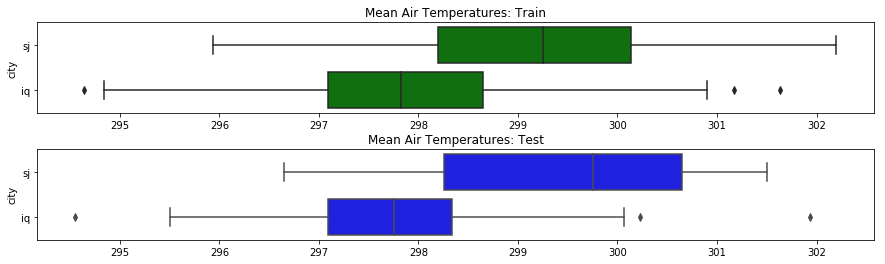

In [16]:
fig = plt.figure(figsize=[15,4])
ax1 = plt.subplot(211)
sns.boxplot(x='reanalysis_air_temp_k', y='city',
            color='green', data=rawfeats, ax=ax1)
plt.xlabel('')
plt.title('Mean Air Temperatures: Train')
ax2 = plt.subplot(212, sharex=ax1)
plt.title('Mean Air Temperatures: Test')
sns.boxplot(x='reanalysis_air_temp_k', y='city',
            color='blue', data=testfeats, ax=ax2)
plt.xlabel('')
plt.subplots_adjust(hspace=.4)
plt.show()

#### Each city has a temperature cycle that could perhaps be engineered into a seasonal feature

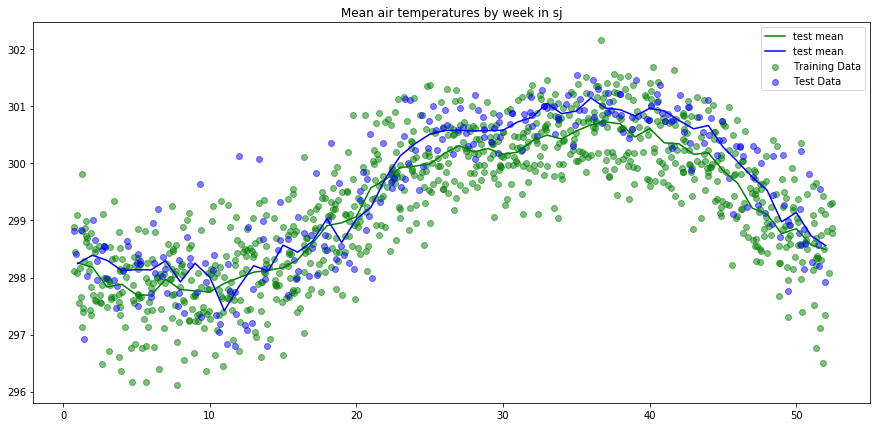

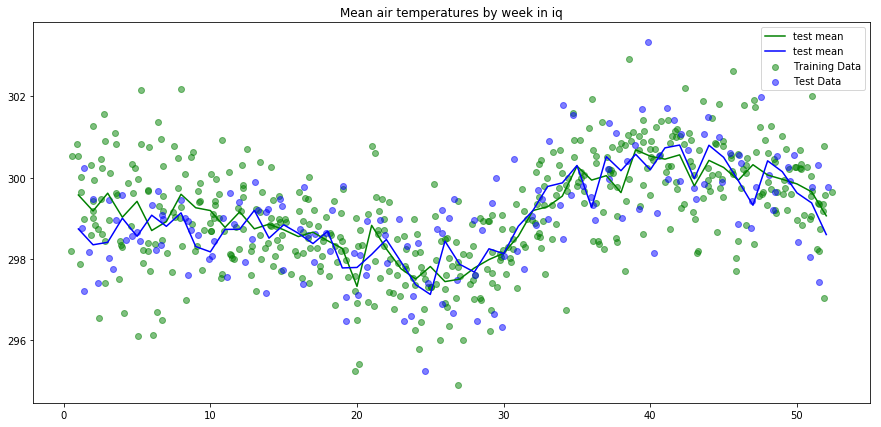

In [18]:
v = 'reanalysis_avg_temp_k'
c = 'sj'

plt.figure(figsize=[15,7])
plt.title('Mean air temperatures by week in {}'.format(c))
plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               rawfeats[rawfeats.city==c].weekofyear],
            y=rawfeats[rawfeats.city==c][v], 
            alpha=.5, color='green', label='Training Data')
plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               testfeats[testfeats.city==c].weekofyear],
            y=testfeats[testfeats.city==c][v], 
            alpha=.5, color='blue', label='Test Data')
plt.plot(rawfeats[rawfeats.city==c].groupby('weekofyear')[v].mean(),
        label='test mean', color='green')
plt.plot(testfeats[testfeats.city==c].groupby('weekofyear')[v].mean(),
        label='test mean', color='blue')
plt.legend()
plt.show()

c='iq'
plt.figure(figsize=[15,7])
plt.title('Mean air temperatures by week in {}'.format(c))
plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               rawfeats[rawfeats.city==c].weekofyear],
            y=rawfeats[rawfeats.city==c][v], 
            alpha=.5, color='green', label='Training Data')
plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               testfeats[testfeats.city==c].weekofyear],
            y=testfeats[testfeats.city==c][v], 
            alpha=.5, color='blue', label='Test Data')
plt.plot(rawfeats[rawfeats.city==c].groupby('weekofyear')[v].mean(),
        label='test mean', color='green')
plt.plot(testfeats[testfeats.city==c].groupby('weekofyear')[v].mean(),
        label='test mean', color='blue')
plt.legend()
plt.show()

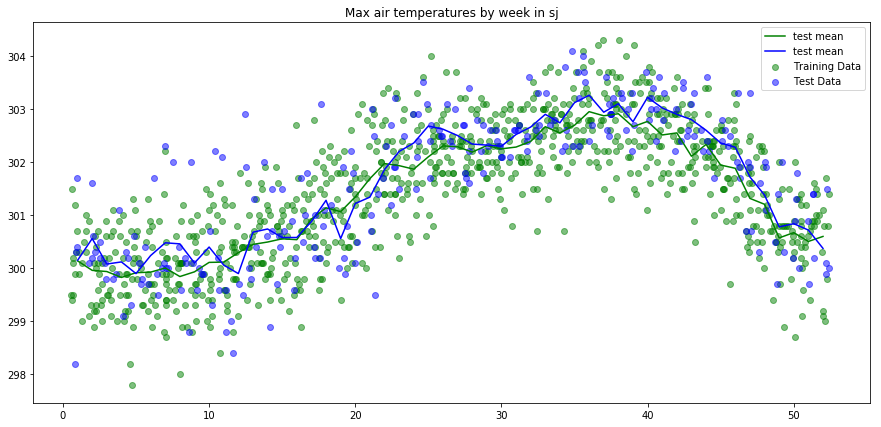

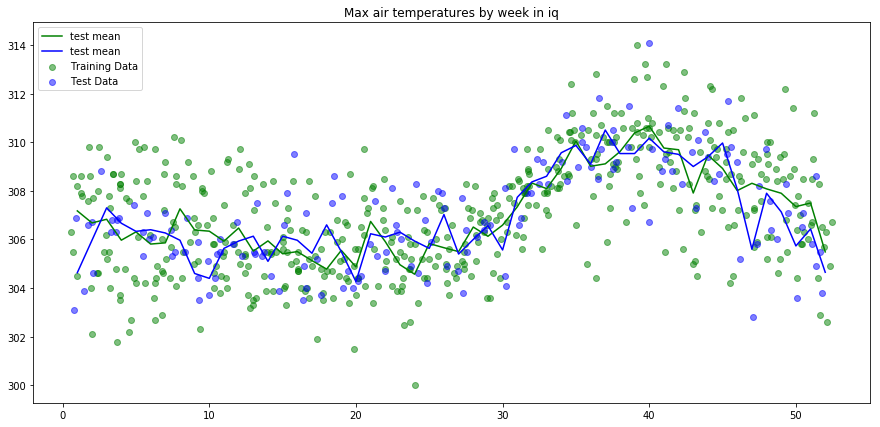

In [19]:
v = 'reanalysis_max_air_temp_k'
c = 'sj'

plt.figure(figsize=[15,7])
plt.title('Max air temperatures by week in {}'.format(c))
plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               rawfeats[rawfeats.city==c].weekofyear],
            y=rawfeats[rawfeats.city==c][v], 
            alpha=.5, color='green', label='Training Data')
plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               testfeats[testfeats.city==c].weekofyear],
            y=testfeats[testfeats.city==c][v], 
            alpha=.5, color='blue', label='Test Data')
plt.plot(rawfeats[rawfeats.city==c].groupby('weekofyear')[v].mean(),
        label='test mean', color='green')
plt.plot(testfeats[testfeats.city==c].groupby('weekofyear')[v].mean(),
        label='test mean', color='blue')
plt.legend()
plt.show()

c='iq'
plt.figure(figsize=[15,7])
plt.title('Max air temperatures by week in {}'.format(c))
plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               rawfeats[rawfeats.city==c].weekofyear],
            y=rawfeats[rawfeats.city==c][v], 
            alpha=.5, color='green', label='Training Data')
plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               testfeats[testfeats.city==c].weekofyear],
            y=testfeats[testfeats.city==c][v], 
            alpha=.5, color='blue', label='Test Data')
plt.plot(rawfeats[rawfeats.city==c].groupby('weekofyear')[v].mean(),
        label='test mean', color='green')
plt.plot(testfeats[testfeats.city==c].groupby('weekofyear')[v].mean(),
        label='test mean', color='blue')
plt.legend()
plt.show()

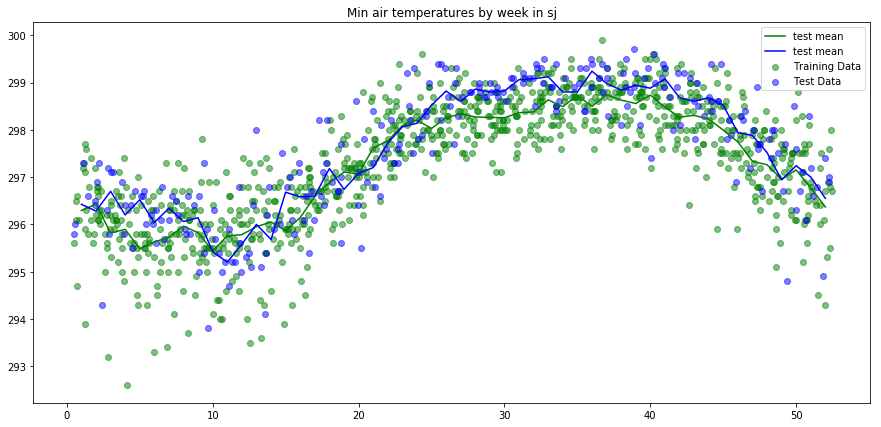

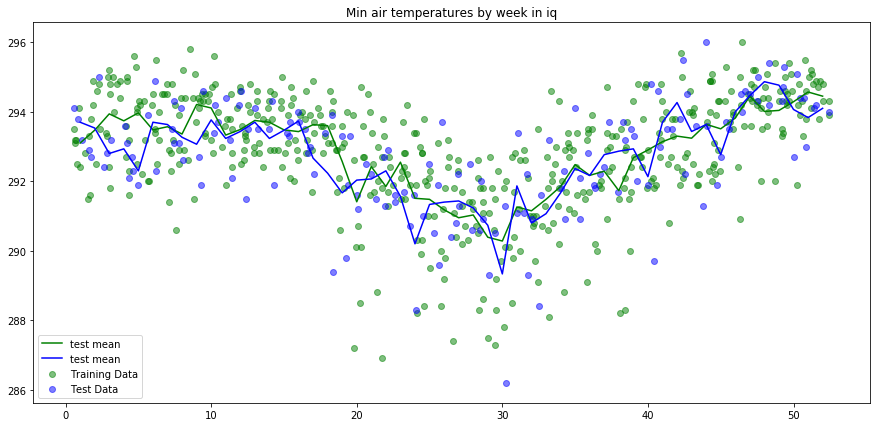

In [20]:
v = 'reanalysis_min_air_temp_k'
c = 'sj'

plt.figure(figsize=[15,7])
plt.title('Min air temperatures by week in {}'.format(c))
plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               rawfeats[rawfeats.city==c].weekofyear],
            y=rawfeats[rawfeats.city==c][v], 
            alpha=.5, color='green', label='Training Data')
plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               testfeats[testfeats.city==c].weekofyear],
            y=testfeats[testfeats.city==c][v], 
            alpha=.5, color='blue', label='Test Data')
plt.plot(rawfeats[rawfeats.city==c].groupby('weekofyear')[v].mean(),
        label='test mean', color='green')
plt.plot(testfeats[testfeats.city==c].groupby('weekofyear')[v].mean(),
        label='test mean', color='blue')
plt.legend()
plt.show()

c='iq'
plt.figure(figsize=[15,7])
plt.title('Min air temperatures by week in {}'.format(c))
plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               rawfeats[rawfeats.city==c].weekofyear],
            y=rawfeats[rawfeats.city==c][v], 
            alpha=.5, color='green', label='Training Data')
plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               testfeats[testfeats.city==c].weekofyear],
            y=testfeats[testfeats.city==c][v], 
            alpha=.5, color='blue', label='Test Data')
plt.plot(rawfeats[rawfeats.city==c].groupby('weekofyear')[v].mean(),
        label='test mean', color='green')
plt.plot(testfeats[testfeats.city==c].groupby('weekofyear')[v].mean(),
        label='test mean', color='blue')
plt.legend()
plt.show()

#### One of the cities also has some seasons with larger daily swings in temperature, which could impact mosquito populations and is also worth extracting as a feature

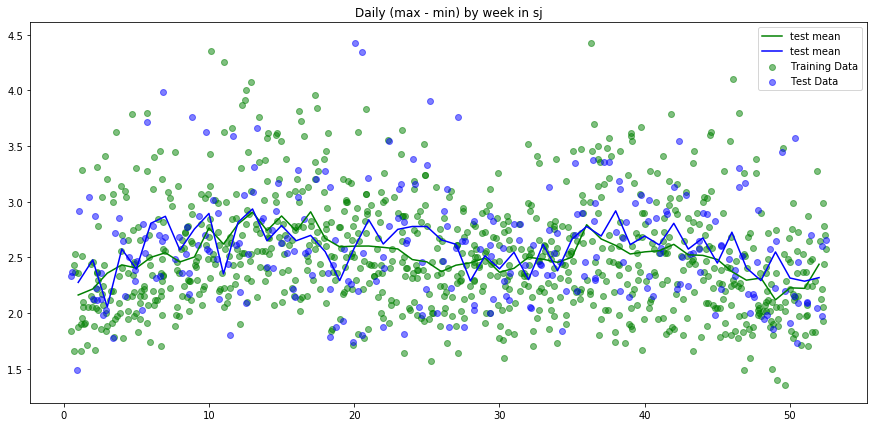

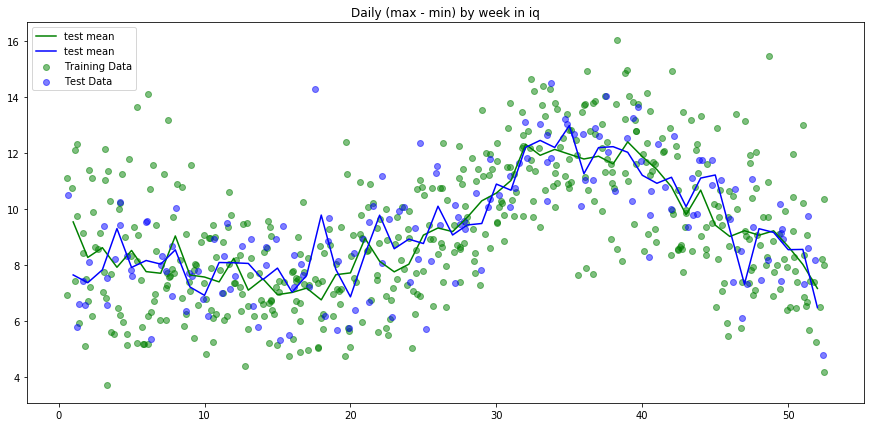

In [21]:
v = 'reanalysis_tdtr_k'
c = 'sj'

plt.figure(figsize=[15,7])
plt.title('Daily (max - min) by week in {}'.format(c))
plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               rawfeats[rawfeats.city==c].weekofyear],
            y=rawfeats[rawfeats.city==c][v], 
            alpha=.5, color='green', label='Training Data')
plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               testfeats[testfeats.city==c].weekofyear],
            y=testfeats[testfeats.city==c][v], 
            alpha=.5, color='blue', label='Test Data')
plt.plot(rawfeats[rawfeats.city==c].groupby('weekofyear')[v].mean(),
        label='test mean', color='green')
plt.plot(testfeats[testfeats.city==c].groupby('weekofyear')[v].mean(),
        label='test mean', color='blue')
plt.legend()
plt.show()

c='iq'
plt.figure(figsize=[15,7])
plt.title('Daily (max - min) by week in {}'.format(c))
plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               rawfeats[rawfeats.city==c].weekofyear],
            y=rawfeats[rawfeats.city==c][v], 
            alpha=.5, color='green', label='Training Data')
plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               testfeats[testfeats.city==c].weekofyear],
            y=testfeats[testfeats.city==c][v], 
            alpha=.5, color='blue', label='Test Data')
plt.plot(rawfeats[rawfeats.city==c].groupby('weekofyear')[v].mean(),
        label='test mean', color='green')
plt.plot(testfeats[testfeats.city==c].groupby('weekofyear')[v].mean(),
        label='test mean', color='blue')
plt.legend()
plt.show()

## Rain: PERSIANN Satellite at a .25x.25 degree scale

#### Again, we see some training outliers in each city that may be worth capping or removing

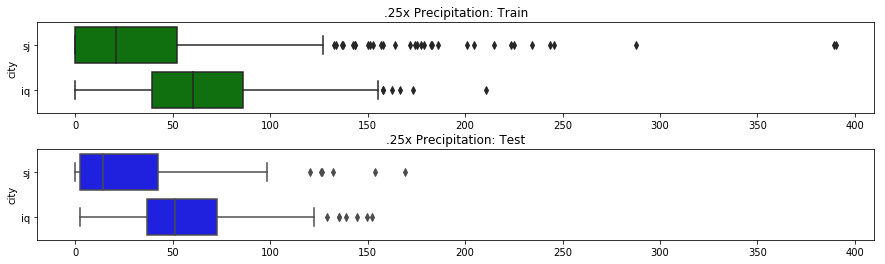

In [22]:
#Rain
fig = plt.figure(figsize=[15,4])
ax1 = plt.subplot(211)
sns.boxplot(x='precipitation_amt_mm', y='city',
            color='green', data=rawfeats, ax=ax1)
plt.xlabel('')
plt.title('.25x Precipitation: Train')
ax2 = plt.subplot(212, sharex=ax1)
plt.title('.25x Precipitation: Test')
sns.boxplot(x='precipitation_amt_mm', y='city',
            color='blue', data=testfeats, ax=ax2)
plt.xlabel('')
plt.subplots_adjust(hspace=.4)
plt.show()

## Rain: NOAA's NCEP Climate Forecast System REanalysis at a .5x.5 degree scale

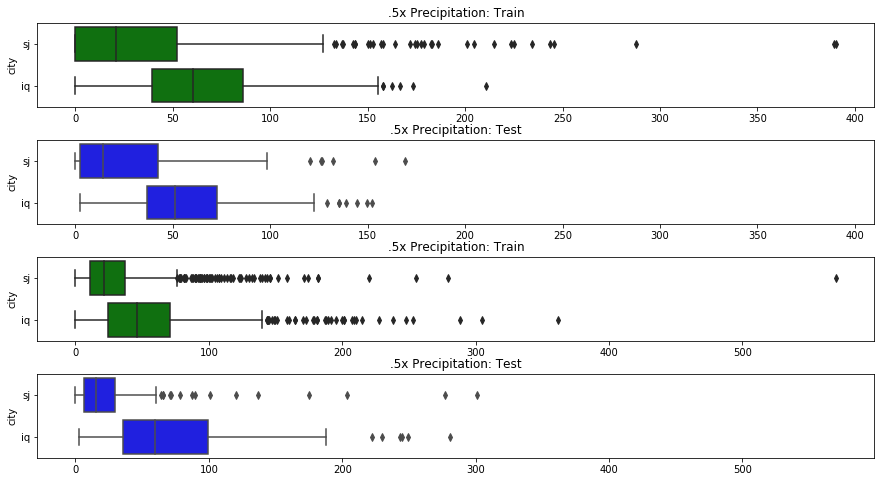

In [23]:
#Rain
fig = plt.figure(figsize=[15,8])
ax1 = plt.subplot(411)
sns.boxplot(x='reanalysis_sat_precip_amt_mm', y='city',
            color='green', data=rawfeats, ax=ax1)
plt.xlabel('')
plt.title('.5x Precipitation: Train')
ax2 = plt.subplot(412, sharex=ax1)
plt.title('.5x Precipitation: Test')
sns.boxplot(x='reanalysis_sat_precip_amt_mm', y='city',
            color='blue', data=testfeats, ax=ax2)
plt.xlabel('')
plt.subplots_adjust(hspace=.4)

ax3 = plt.subplot(413)
sns.boxplot(x='reanalysis_precip_amt_kg_per_m2', y='city',
            color='green', data=rawfeats, ax=ax3)
plt.xlabel('')
plt.title('.5x Precipitation: Train')

ax4 = plt.subplot(414, sharex=ax3)
plt.title('.5x Precipitation: Test')
sns.boxplot(x='reanalysis_precip_amt_kg_per_m2', y='city',
            color='blue', data=testfeats, ax=ax4)
plt.xlabel('')
plt.subplots_adjust(hspace=.4)
plt.show()


## Humidity: NOAA's NCEP Climate Forecast System Reanalysis

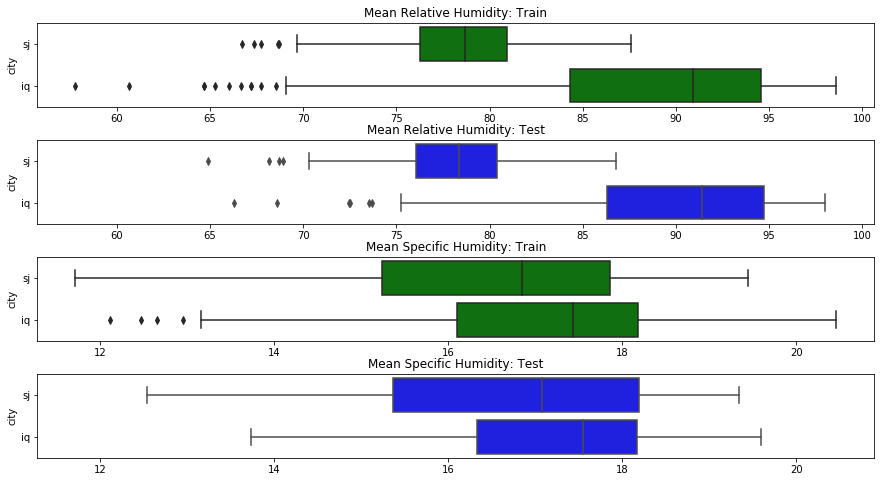

In [24]:
fig = plt.figure(figsize=[15,8])
ax1 = plt.subplot(411)
sns.boxplot(x='reanalysis_relative_humidity_percent', y='city',
            color='green', data=rawfeats, ax=ax1)
plt.xlabel('')
plt.title('Mean Relative Humidity: Train')
ax2 = plt.subplot(412, sharex=ax1)
plt.title('Mean Relative Humidity: Test')
sns.boxplot(x='reanalysis_relative_humidity_percent', y='city',
            color='blue', data=testfeats, ax=ax2)
plt.xlabel('')
plt.subplots_adjust(hspace=.4)

ax3 = plt.subplot(413)
sns.boxplot(x='reanalysis_specific_humidity_g_per_kg', y='city',
            color='green', data=rawfeats, ax=ax3)
plt.xlabel('')
plt.title('Mean Specific Humidity: Train')

ax4 = plt.subplot(414, sharex=ax3)
plt.title('Mean Specific Humidity: Test')
sns.boxplot(x='reanalysis_specific_humidity_g_per_kg', y='city',
            color='blue', data=testfeats, ax=ax4)
plt.xlabel('')
plt.subplots_adjust(hspace=.4)
plt.show()


## Vegetation Index

#### SJ seems relatively stable whereas IQ has some slight vegetation seasonality

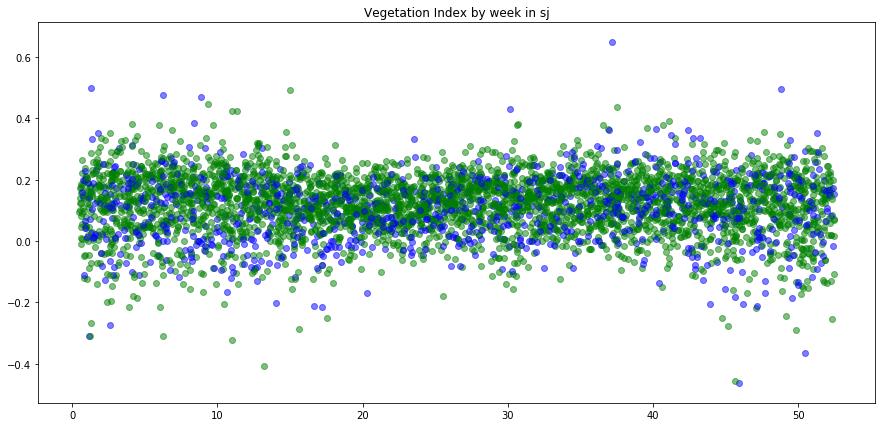

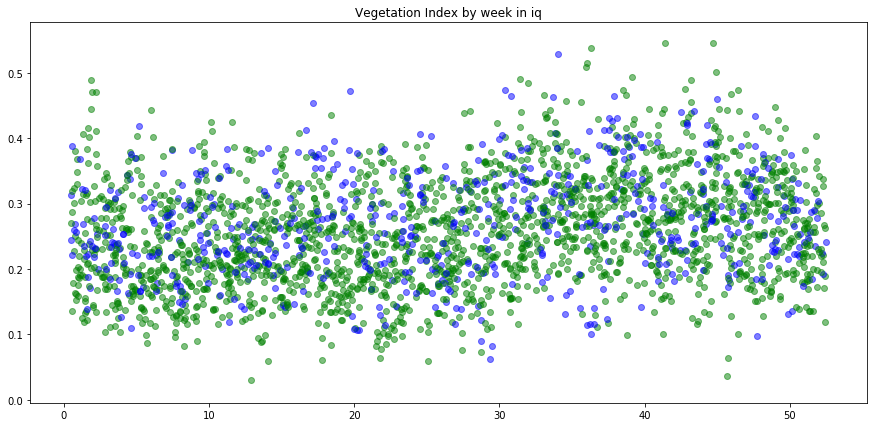

In [25]:
v = ['ndvi_se','ndvi_sw','ndvi_ne','ndvi_nw']
c = 'sj'

plt.figure(figsize=[15,7])
plt.title('Vegetation Index by week in {}'.format(c))
for pixel in v:
    plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               rawfeats[rawfeats.city==c].weekofyear],
            y=rawfeats[rawfeats.city==c][pixel], 
            alpha=.5, color='green', label='Training Data')
    plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               testfeats[testfeats.city==c].weekofyear],
            y=testfeats[testfeats.city==c][pixel], 
            alpha=.5, color='blue', label='Test Data')
plt.show()

c='iq'
plt.figure(figsize=[15,7])
plt.title('Vegetation Index by week in {}'.format(c))
for pixel in v:
    plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               rawfeats[rawfeats.city==c].weekofyear],
            y=rawfeats[rawfeats.city==c][pixel], 
            alpha=.5, color='green', label='Training Data')
    plt.scatter(x=[x+np.random.uniform(-.5,.5) for x in
               testfeats[testfeats.city==c].weekofyear],
            y=testfeats[testfeats.city==c][pixel], 
            alpha=.5, color='blue', label='Test Data')
plt.show()

# Training Labels Analysis

In [35]:
rawfeats['total_cases'] = rawlabels.total_cases
sjcorr = (rawfeats[rawfeats.city=='sj']
          .corr()
          .total_cases
          .drop('total_cases', axis=0)
          .sort_values())
iqcorr = (rawfeats[rawfeats.city=='iq']
          .corr()
          .total_cases
          .drop('total_cases', axis=0)
          .sort_values())

#### None of the original features have overly strong correlations with the total cases target variable, but some of the features with clear patterns above do seem to be promising

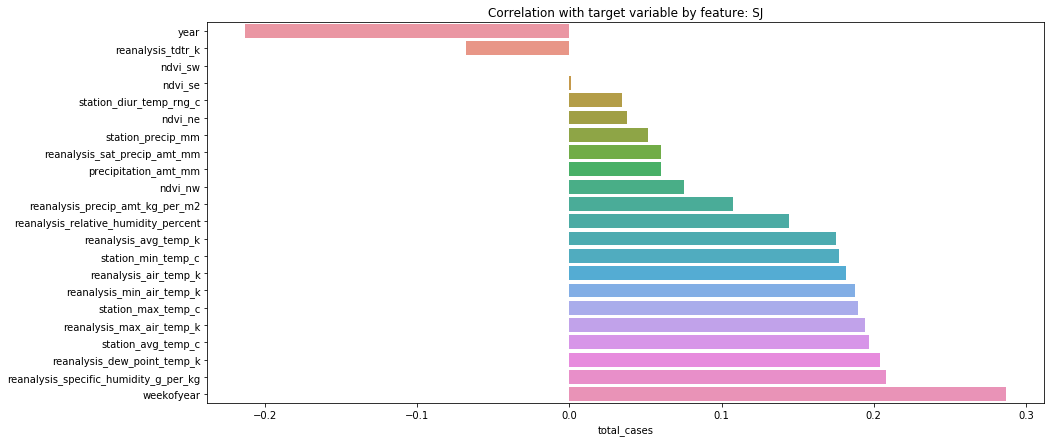

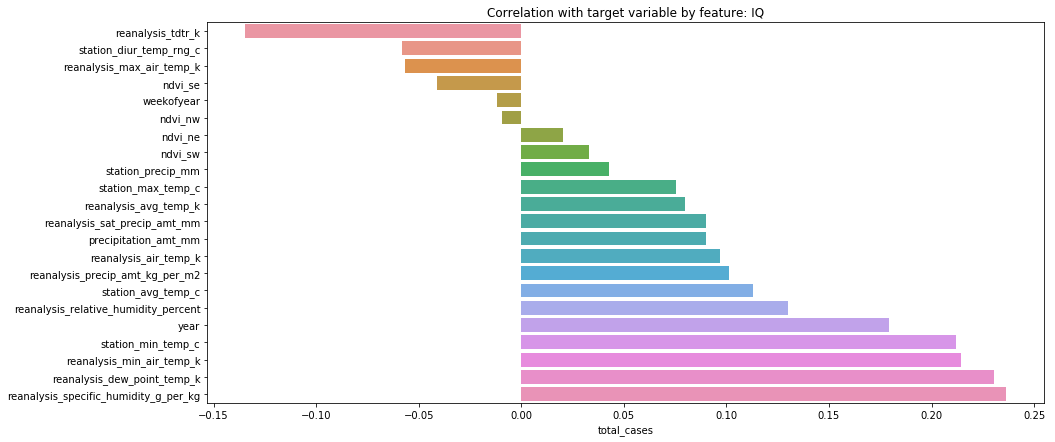

In [36]:
plt.figure(figsize=[15,7])
plt.title('Correlation with target variable by feature: SJ')
sns.barplot(x=sjcorr, y=sjcorr.index)
plt.show()
plt.figure(figsize=[15,7])
plt.title('Correlation with target variable by feature: IQ')
sns.barplot(x=iqcorr, y=iqcorr.index)
plt.show()

### Full Heatmaps

In [50]:
# compute the correlations
sj_correlations = rawfeats[rawfeats.city =='sj'].corr()
iq_correlations = rawfeats[rawfeats.city =='iq'].corr()

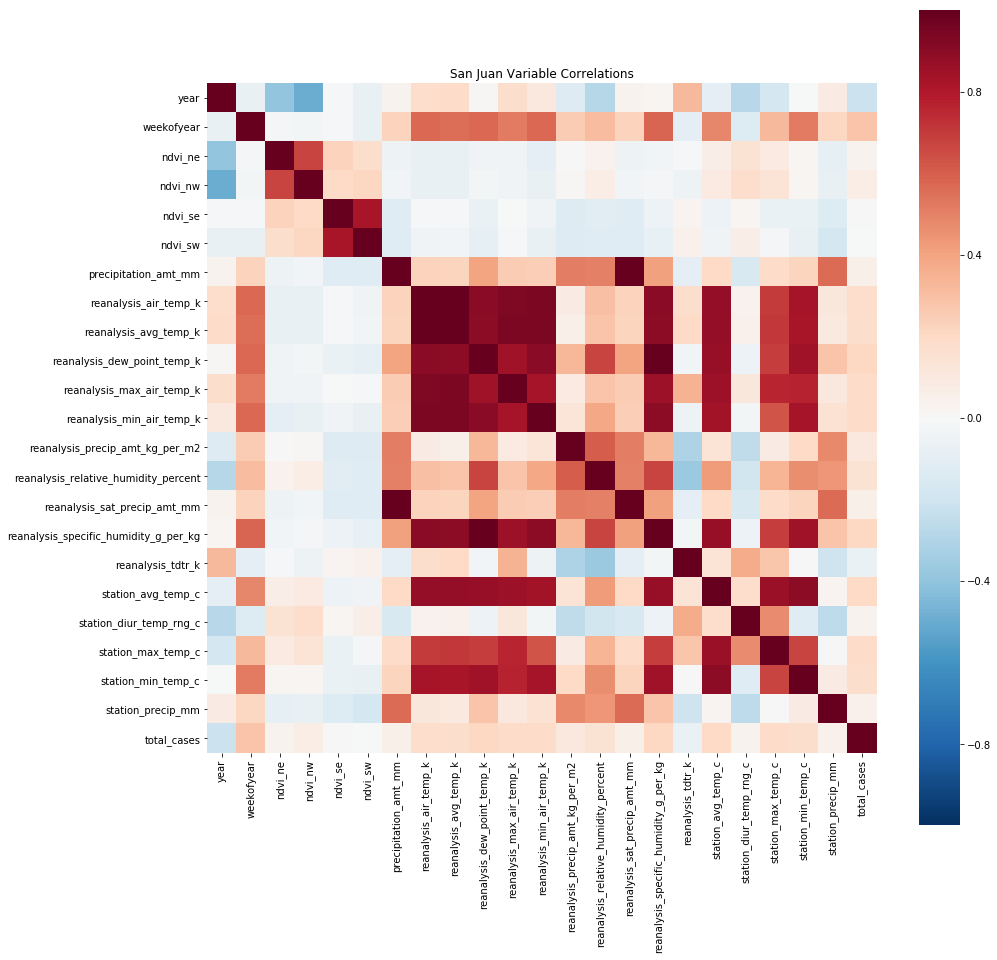

In [56]:
# plot san juan
plt.figure(figsize=[15,15])
sj_corr_heat = sns.heatmap(sj_correlations, 
                square=True, vmin=-1, vmax=1, 
                center=0, cmap='RdBu_r')
plt.title('San Juan Variable Correlations')
plt.show()

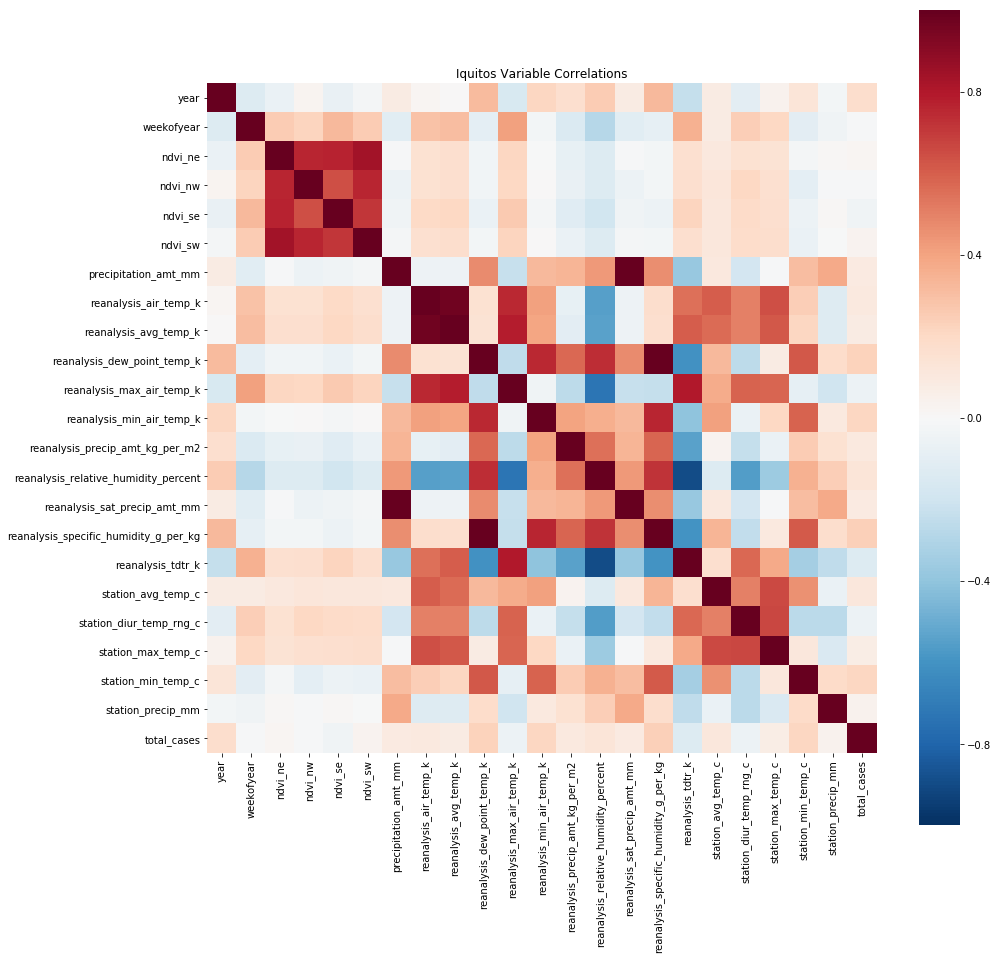

In [57]:
# plot iquitos
plt.figure(figsize=[15,15])
iq_corr_heat = sns.heatmap(iq_correlations, 
                square=True, vmin=-1, vmax=1, 
                center=0, cmap='RdBu_r')
plt.title('Iquitos Variable Correlations')
plt.show()